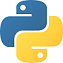
# Graphs #

### N. Day - September 2022 ###

## This section introduces graph theory. It contains interactive code (there may be some errors for you to repair) and (possibly) a multiple choice quiz. <font color = 'red'> For the 2023-24 run of CO536, there are no further assessed logbook exercises. </font> There is, however, an exercise at the end of this notebook if you would like to implement a Graph and test BFS and DFS. 

 - The basis of a Graph class in Python is the implementation of two classes, Graph and Vertex, which establish the essential functionality to create a variety of graphs.
 - The Vertex class allows for storage of connecting vertices with a dictionary and adjustment of their edges as well.
 - The Graph class builds upon the Vertex methods and allows addition of vertices and edges, setting the directionality of edges, and determining if a path exists between two vertices.


## Graph Theory 

𝐺 = (𝑉,𝐸)

In mathematics, graph theory is the study of graphs, which are mathemtaical structures used to model pairwise relations between objects. Graphs are the basic subject studied by graph theory. The term first originated from an article written by J.J. Sylvester in 1878 - used in relation between mathematics and chemical structure. 

More here: [Graphs Wikipedia entry](
https://en.wikipedia.org/wiki/Graph_theory#:~:text=In%20mathematics%2C%20graph%20theory%20is,also%20called%20links%20or%20lines)

SYLVESTER, J. Chemistry and Algebra . Nature 17, 284 (1878). https://doi.org/10.1038/017284a0


# Basics and Terminology 

Unlike a Tree, which focusses on the arrangement of nodes (especially the Binary Search Tree), <b>graphs focus on the distance (or weighting) between nodes</b>. Applying Graph Theory to programming enables us to represent nodes in a physical or virtual network, geographical maps and satnav applications, and Artificial Neural Networks (ANN).

Nodes are referred to as vertices (vertex) and the pathways between them referred to as edges.

![graphs.png](https://media.geeksforgeeks.org/wp-content/cdn-uploads/undirectedgraph.png)


# Directed and Undirected Graphs

In an undirected graph, it's possible to go back and forth (two-way relationship), whereas in a directed graph, there may be a one way relationship between two nodes in a graph.

![directed_undirected](https://miro.medium.com/max/1400/1*HpYMnHjGZWmH9NKRG05lAg.jpeg)

# Weighted and Unweighted Graphs

Unweighted graphs could mean that the distance between each vertex is the same (often modelled by the value 1 in an adjaceny matrix). Whereas, in a directed graph, each edge would represent a unique value that represents time, distance or some weighting (cost) that it would take to travel between the vertices.

![weighted_unweighted](https://afteracademy.com/images/introduction-to-graph-in-programming-weighted-unweighted-graph-52bd4ce5100286b8.png)

# Adjacency Matrix

As previously mentioned, the adjacency matrix stores the value representing the distance/time/weighting for each edge between pair of adjacent vertices. Like a 2D array, 

![adj_list](https://www.softwaretestinghelp.com/wp-content/qa/uploads/2020/05/4-5.png)

# Adjacency Lists:

An alternate to the 2D array/matrix which is indexed, would be a referenced structure. Each vertex of the graph holds a linked list of nodes (the connections from that vertex) and the distance/cost/time/weighting to get to that vertex in the graph.

![adj_list](https://www.softwaretestinghelp.com/wp-content/qa/uploads/2020/05/9-1.png)

# Function signatures (headers) for a Graph class:

In [ ]:
## Codeacademy 

class Vertex:
  """Key methods of Vertex class"""
  def __init__(self, value):
    ...
  def add_edge(self, vertex, weight = 0):
    ...
  def get_edges(self):
    ...

class Graph:
  """Key methods of Graph class"""
  def __init__(self, directed = False):
    ...
  def add_vertex(self, vertex):
    ...
  def add_edge(self, from_vertex, to_vertex, weight = 0):
    ...
  def find_path(self, start_vertex, end_vertex):
    ...

# Simple Graph implementation

In [ ]:
from random import randrange
from graph import Graph
from vertex import Vertex

def print_graph(graph):
  for vertex in graph.graph_dict:
    print("")
    print(vertex + " connected to")
    vertex_neighbors = graph.graph_dict[vertex].edges
    if len(vertex_neighbors) == 0:
      print("No edges!")
    for adjacent_vertex in vertex_neighbors:
      print("=> " + adjacent_vertex)


def build_graph(directed):
  g = Graph(directed)
  vertices = []
  for val in ['a', 'b', 'c', 'd', 'e', 'f', 'g']:
    vertex = Vertex(val)
    vertices.append(vertex)
    g.add_vertex(vertex)

  for v in range(len(vertices)):
    v_idx = randrange(0, len(vertices) - 1)
    v1 = vertices[v_idx]
    v_idx = randrange(0, len(vertices) - 1)
    v2 = vertices[v_idx]
    g.add_edge(v1, v2, randrange(1, 10))

  print_graph(g)

build_graph(False)


# Building the Vertex Class

In [4]:
class Vertex:
  def __init__(self, value):
    self.value = value
    self.edges = {}

  # define .add_edge() here
  def add_edge(self, vertex):
    print("Adding edge to " + vertex)
    self.edges[vertex] = True

  def get_edges(self):
    return list(self.edges.keys())

  
grand_central = Vertex('Grand Central Station')
forty_second_street = Vertex('42nd Street Station')

print(grand_central.get_edges())

# call .add_edge() below here
grand_central.add_edge(forty_second_street.value)

print(grand_central.get_edges())
print(forty_second_street.get_edges())

forty_second_street.add_edge(grand_central.value)
print(forty_second_street.get_edges())


[]
Adding edge to 42nd Street Station
['42nd Street Station']
[]
Adding edge to Grand Central Station
['Grand Central Station']


In [6]:
# Bring in the Vertex class from vertex.py
class Vertex:
  def __init__(self, value):
    self.value = value
    self.edges = {}

  # define .add_edge() here
  def add_edge(self, vertex):
    print("Adding edge to " + vertex)
    self.edges[vertex] = True

  def get_edges(self):
    return list(self.edges.keys())

# Define Graph below...
class Graph:
  def __init__(self, directed = False):
    self.graph_dict = {}
    self.directed = directed
    
  def add_vertex(self, vertex):
    print("Adding " + vertex.value)
    self.graph_dict[vertex.value] = vertex


grand_central = Vertex("Grand Central Station")

# Uncomment this code after you've defined Graph
railway = Graph()

# Uncomment these lines after you've completed .add_vertex()
print(railway.graph_dict)
railway.add_vertex(grand_central)
print(railway.graph_dict)


forty_second_street = Vertex('42nd Street Station')
railway.add_vertex(forty_second_street)
print(railway.graph_dict)

# call .add_edge() below here
grand_central.add_edge(forty_second_street.value)

print(grand_central.get_edges())


{}
Adding Grand Central Station
{'Grand Central Station': <__main__.Vertex object at 0x106baa850>}
Adding 42nd Street Station
{'Grand Central Station': <__main__.Vertex object at 0x106baa850>, '42nd Street Station': <__main__.Vertex object at 0x106baac10>}
Adding edge to 42nd Street Station
['42nd Street Station']


# Building the Graph Class

In [15]:
class Graph:
  def __init__(self, directed = False):
    self.graph_dict = {}
    self.directed = directed

  def add_vertex(self, vertex):
    self.graph_dict[vertex.value] = vertex

  def add_edge(self, from_vertex, to_vertex, weight = 0):
    self.graph_dict[from_vertex.value].add_edge(to_vertex.value, weight)
    if not self.directed:
      self.graph_dict[to_vertex.value].add_edge(from_vertex.value, weight)

  def find_path(self, start_vertex, end_vertex):
    start = [start_vertex]
    while len(start) > 0:
      current_vertex = start.pop(0)
      print("Visiting " + current_vertex)
      #START CODE HERE
      if current_vertex == end_vertex:
        return True
      vertex = self.graph_dict[current_vertex]
      next_vertices = vertex.get_edges()
      start += next_vertices
    return False
   

grand_central = Vertex("Grand Central Station")

# Uncomment this code after you've defined Graph
railway = Graph()
print(railway.graph_dict)
railway.add_vertex(grand_central)



forty_second_street = Vertex('42nd Street Station')
railway.add_vertex(forty_second_street)
print(railway.graph_dict)

# call .add_edge() below here
#grand_central.add_edge(forty_second_street.value)

#railway.add_edge(grand_central, forty_second_street)




{}
{'Grand Central Station': <__main__.Vertex object at 0x106e41910>, '42nd Street Station': <__main__.Vertex object at 0x106e61850>}


# Directed Graph - adding vertexes

In [16]:
class Graph:
  def __init__(self, directed = False):
    self.graph_dict = {}
    self.directed = directed

  def add_vertex(self, vertex):
    self.graph_dict[vertex.value] = vertex

  def add_edge(self, from_vertex, to_vertex, weight = 0):
    self.graph_dict[from_vertex.value].add_edge(to_vertex.value, weight)
    if not self.directed:
      self.graph_dict[to_vertex.value].add_edge(from_vertex.value, weight)

  def find_path(self, start_vertex, end_vertex):
    start = [start_vertex]
    while len(start) > 0:
      current_vertex = start.pop(0)
      print("Visiting " + current_vertex)
      #START CODE HERE
      if current_vertex == end_vertex:
        return True
      vertex = self.graph_dict[current_vertex]
      next_vertices = vertex.get_edges()
      start += next_vertices
    return False
   

class Vertex:
  def __init__(self, value):
    self.value = value
    self.edges = {}

  # define .add_edge() here
  def add_edge(self, vertex, weight = 0):
    print("Adding edge to " + vertex)
    self.edges[vertex] = True

  def get_edges(self):
    return list(self.edges.keys())

no_path_exists = True

directed_railway = Graph(True)

callan_station = Vertex('callan')
peel_station = Vertex('peel')
ulfstead_station = Vertex('ulfstead')
harwick_station = Vertex('harwick')

directed_railway.add_vertex(callan_station)
directed_railway.add_vertex(peel_station)
directed_railway.add_vertex(harwick_station)
directed_railway.add_vertex(ulfstead_station)

directed_railway.add_edge(harwick_station, peel_station)
directed_railway.add_edge(peel_station, callan_station)


path_exists = directed_railway.find_path('harwick', 'harwick')
print(path_exists)

#Uncomment for final checkpoint

print("\n\n\nFinding path from harwick to callan\n")
new_path_exists = directed_railway.find_path('harwick', 'callan')
print(new_path_exists)
print("\n\nTrying to find path from harwick to ulfstead\n")
no_path_exists = directed_railway.find_path('harwick', 'ulfstead')
print(no_path_exists)



Adding edge to peel
Adding edge to callan
Visiting harwick
True



Finding path from harwick to callan

Visiting harwick
Visiting peel
Visiting callan
True


Trying to find path from harwick to ulfstead

Visiting harwick
Visiting peel
Visiting callan
False


# Refactor - for undirected graphs

In [9]:
class Graph:
  def __init__(self, directed = False):
    self.graph_dict = {}
    self.directed = directed

  def add_vertex(self, vertex):
    self.graph_dict[vertex.value] = vertex

  def add_edge(self, from_vertex, to_vertex, weight = 0):
    self.graph_dict[from_vertex.value].add_edge(to_vertex.value, weight)
    if not self.directed:
      self.graph_dict[to_vertex.value].add_edge(from_vertex.value, weight)

  def find_path(self, start_vertex, end_vertex):
    start = [start_vertex]
    # Checkpoint 1, replace these comments:
    # Use a dictionary to track which
    # vertices we've already visited
    seen = {}
    while len(start) > 0:
      current_vertex = start.pop(0)
      # Checkpoint 2, replace these comments:
      # Update the `seen` variable
      # now that we've visited current_vertex
      seen[current_vertex] = True
      print("Visiting " + current_vertex)
      if current_vertex == end_vertex:
        return True
      else:
        vertex = self.graph_dict[current_vertex]
        next_vertices = vertex.get_edges()
        
        # Filter next_vertices so it only
        # includes vertices NOT IN seen
        
        # Checkpoint 3, uncomment and replace the question marks:
        next_vertices = [vertex for vertex in next_vertices if vertex not in seen]
        start.extend(next_vertices)
        
    return False





class Vertex:
  def __init__(self, value):
    self.value = value
    self.edges = {}

  # define .add_edge() here
  def add_edge(self, vertex, weight = 0):
    print("Adding edge to " + vertex)
    self.edges[vertex] = True

  def get_edges(self):
    return list(self.edges.keys())



railway = Graph()

callan = Vertex('callan')
peel = Vertex('peel')
ulfstead = Vertex('ulfstead')
harwick = Vertex('harwick')

railway.add_vertex(callan)
railway.add_vertex(peel)
railway.add_vertex(harwick)
railway.add_vertex(ulfstead)

railway.add_edge(peel, harwick)
railway.add_edge(harwick, callan)
railway.add_edge(callan, peel)

# Uncomment the code below when you're done refactoring!

peel_to_ulfstead_path_exists = railway.find_path('peel', 'ulfstead')
harwick_to_peel_path_exists = railway.find_path('harwick', 'peel')

print("A path exists between peel and ulfstead:")
print(peel_to_ulfstead_path_exists)
print("A path exists between harwick and peel:")
print(harwick_to_peel_path_exists)



Adding edge to harwick
Adding edge to peel
Adding edge to callan
Adding edge to harwick
Adding edge to peel
Adding edge to callan
Visiting peel
Visiting harwick
Visiting callan
Visiting callan
Visiting harwick
Visiting peel
A path exists between peel and ulfstead:
False
A path exists between harwick and peel:
True


# Bringing all together

In [10]:
from random import randrange


class Graph:
  def __init__(self, directed = False):
    self.graph_dict = {}
    self.directed = directed

  def add_vertex(self, vertex):
    self.graph_dict[vertex.value] = vertex

  def add_edge(self, from_vertex, to_vertex, weight = 0):
    self.graph_dict[from_vertex.value].add_edge(to_vertex.value, weight)
    if not self.directed:
      self.graph_dict[to_vertex.value].add_edge(from_vertex.value, weight)

  def find_path(self, start_vertex, end_vertex):
    start = [start_vertex]
    seen = {}
    while len(start) > 0:
      current_vertex = start.pop(0)
      seen[current_vertex] = True
      print("Visiting " + current_vertex)
      if current_vertex == end_vertex:
        return True
      else:
        vertices_to_visit = set(self.graph_dict[current_vertex].edges.keys())
        start += [vertex for vertex in vertices_to_visit if vertex not in seen]
    return False


class Vertex:
  def __init__(self, value):
    self.value = value
    self.edges = {}

  def add_edge(self, vertex, weight = 0):
    self.edges[vertex] = weight

  def get_edges(self):
    return list(self.edges.keys())


def print_graph(graph):
  for vertex in graph.graph_dict:
    print("")
    print(vertex + " connected to")
    vertex_neighbors = graph.graph_dict[vertex].edges
    if len(vertex_neighbors) == 0:
      print("No edges!")
    for adjacent_vertex in vertex_neighbors:
      print("=> " + adjacent_vertex)


def build_graph(directed):
  g = Graph(directed)
  vertices = []
  for val in ['a', 'b', 'c', 'd', 'e', 'f', 'g']:
    vertex = Vertex(val)
    vertices.append(vertex)
    g.add_vertex(vertex)

  for v in range(len(vertices)):
    v_idx = randrange(0, len(vertices) - 1)
    v1 = vertices[v_idx]
    v_idx = randrange(0, len(vertices) - 1)
    v2 = vertices[v_idx]
    g.add_edge(v1, v2, randrange(1, 10))

  print_graph(g)

build_graph(False)



a connected to
=> b

b connected to
=> c
=> a

c connected to
=> c
=> b
=> f
=> e

d connected to
=> e

e connected to
=> d
=> c

f connected to
=> c

g connected to
No edges!


# DFS and BFS for Graphs

We previously applied BFS and DFS to trees. We can now apply the same concepts to a graph. We just have to change the implementation slightly. 

# Depth-First Search

- Remember that DFS uses a STACK

![DFS_Graph](https://www.codesdope.com/staticroot/images/algorithm/dfs.gif)

In [17]:
def dfs(graph, current_vertex, target_value, visited=None):
  if visited is None:
    visited = []
	
  visited.append(current_vertex)
  
  if current_vertex == target_value:
    return visited
	
  # Add your recursive case here:
  for neighbor in graph[current_vertex]:
    if neighbor not in visited:
      path = dfs(graph, neighbor, target_value, visited)
      
      if path:
        return path
      

the_most_dangerous_graph = {
    'lava': set(['sharks', 'piranhas']),
    'sharks': set(['lava', 'bees', 'lasers']),
    'piranhas': set(['lava', 'crocodiles']),
    'bees': set(['sharks']),
    'lasers': set(['sharks', 'crocodiles']),
    'crocodiles': set(['piranhas', 'lasers'])
  }

# Call dfs() below and print the result:
print(dfs(the_most_dangerous_graph, "crocodiles", "bees"))

['crocodiles', 'lasers', 'sharks', 'lava', 'piranhas', 'bees']


# Breadth-First Search

- Remember that BFS uses a QUEUE

![BFS_on_graphs](https://www.codesdope.com/staticroot/images/algorithm/bfs.gif)

In [18]:
the_most_dangerous_graph = {
    'lava': set(['sharks', 'piranhas']),
    'sharks': set(['lava', 'bees', 'lasers']),
    'piranhas': set(['lava', 'crocodiles']),
    'bees': set(['sharks']),
    'lasers': set(['sharks', 'crocodiles']),
    'crocodiles': set(['piranhas', 'lasers'])
  }

def bfs(graph, start_vertex, target_value):
  path = [start_vertex]
  vertex_and_path = [start_vertex, path]
  bfs_queue = [vertex_and_path]
  visited = set()
  
  while bfs_queue:
    current_vertex, path = bfs_queue.pop(0)
    visited.add(current_vertex)
    
    for neighbor in graph[current_vertex]:
      # Finish the function here:
      if neighbor not in visited:
        if neighbor is target_value:
          return path + [neighbor]
        else:
          bfs_queue.append([neighbor, path + [neighbor]])
      
# Call bfs() below and print the result:
print(bfs(the_most_dangerous_graph, "crocodiles", "bees"))

['crocodiles', 'lasers', 'sharks', 'bees']


# Comparison of DFS and BFS 

![BFS_DFS_Graphs](https://miro.medium.com/max/1280/1*GT9oSo0agIeIj6nTg3jFEA.gif)


![maze](https://d18l82el6cdm1i.cloudfront.net/uploads/mf7THWHAbL-mazegif.gif)

In [ ]:
## Codeacadeny 

def dfs(graph, current_vertex, target_value, visited = None):
  if visited is None:
    visited = []
  visited.append(current_vertex)
  if current_vertex is target_value:
    return visited
  
  for neighbor in graph[current_vertex]:
    if neighbor not in visited:
      path = dfs(graph, neighbor, target_value, visited)
      if path:
        return path
      
def bfs(graph, start_vertex, target_value):
  path = [start_vertex]
  vertex_and_path = [start_vertex, path]
  bfs_queue = [vertex_and_path]
  visited = set()
  while bfs_queue:
    current_vertex, path = bfs_queue.pop(0)
    visited.add(current_vertex)
    for neighbor in graph[current_vertex]:
      if neighbor not in visited:
        if neighbor is target_value:
          return path + [neighbor]
        else:
          bfs_queue.append([neighbor, path + [neighbor]])

some_hazardous_graph = {
    'lava': set(['sharks', 'piranhas']),
    'sharks': set(['piranhas', 'bees']),
    'piranhas': set(['bees']),
    'bees': set(['lasers']),
    'lasers': set([])
  }

print(bfs(some_hazardous_graph, 'sharks', 'bees'))
print(dfs(some_hazardous_graph, 'sharks', 'bees'))

## Applications of Graphs

### Network of nodes - Neural Networks
![Neural_nets](https://miro.medium.com/v2/resize:fit:1400/0*_SH7tsNDTkGXWtZb.png)

### Shortest Paths between nodes in a network (or minimum spanning)

![shortest_path](https://tomrocksmaths.files.wordpress.com/2023/08/screenshot-2023-08-04-at-11.47.05.png?w=1024)


## <font color="red">Exercise</font> ##

Insert a 'code' cell below. In this do the following:

- 1 - Implement a graph from the code given above. You'll also need an adjacency matrix or list. Try starting with an adjacency matrix.
- 2 - Add a number of verteces (say five to ten) to the graph. 
- 3 - Then add the edges between verteces to connect the verteces in the graph. 
- 4 - Print the adjacency matrix (or list) to check that the verteces are correctly connected by the edges. 
- 5 - Run the BFS algorithm on the graph to check you can get the correct pathway to a target node.
- 6 - Now check the DFS algorithm on the graph to check you can get the correct pathway to a target node. 
- 7 - If you implemented an adjacency matrix previously, now change that to use a linked list. If you started with a linked list, now implement an adjacency matrix. 

# References & Learning Resources#

 - W3Schools - there are many online resources for Python but the Python tutorial at https://www.w3schools.com/python/ is thorough, progressive, interactive and free. If you complete the main tutorial (skip the bits on installing Python as we will be using Ancaconda/Jupyter) the later sections on **"File Handling"**, **"NumPy"** and **"Machine Learning"** are also relevant. The **"Exercises"** and **"Quiz"** sections are also worthwhile activities for consolidating knowledge.
 - **Phillips, D. (2015). Python 3 object-oriented programming. Packt Publishing Ltd.** Although a 3rd edition has been released the 2nd edition is still pretty much up-to-date  and seems to be widely available in PDF format. As an added bonus this covers Design Patterns in some detail.
 - **https://www.learnpython.org/** is another comprehensive and intercative resource
 - **https://docs.python.org/3.7/tutorial/** is Python's own text-based tutorial. Despite the seemingly daunting number of sub-sections, it can be consumed in a fairly short time and manages to be both concise and comprehensive.
 - **Think Python 2e** is an excellent in-depth and free version of the O'Reilly hardcopy by Allen B. Downey and is available here ... https://greenteapress.com/wp/think-python-2e/
 - https://www.sololearn.com/ - great for mobile learning on the go ... free! Recommended by JJ
 - I have also adapted examples from *Learn Python In A Day: The Ultimate Crash Course To Learning The Basics Of Python In No Time* by *Acodemy* but this is out of print and is only mentioned for completeness.